## Semantic Segmentation

In [2]:
import gluoncv as gcv
import matplotlib.pyplot as plt
import mxnet as mx

In [6]:
image_url='https://c1.wallpaperflare.com/preview/425/734/499/dog-dogs-walker-man.jpg'
image_filepath='dog-dogs-walker-man.jpg'
gcv.utils.download(url=image_url,path=image_filepath)

79KB [00:00, 375.26KB/s]                        


'dog-dogs-walker-man.jpg'

In [7]:
image=mx.image.imread(image_filepath)

In [8]:
print(image.shape)

(632, 910, 3)


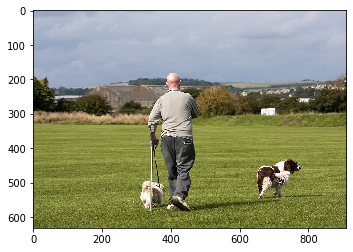

In [10]:
plt.imshow(image.asnumpy())

In [11]:
from mxnet.gluon.data.vision import transforms
transform_fn=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([.485, .456, .406],[.229, .224, .225])
])

In [12]:
image=transform_fn(image)
print(image.shape)

(3, 632, 910)


In [13]:
image=image.expand_dims(0)
print(image.shape)

(1, 3, 632, 910)


In [14]:
network=gcv.model_zoo.get_model('fcn_resnet50_ade',pretrained=True)

57418KB [00:25, 2290.77KB/s]                           


128832KB [00:54, 2361.87KB/s]                            


In [16]:
output=network.demo(image)
print(output.shape)

(1, 150, 632, 910)


/home/altaf/anaconda3/lib/python3.7/site-packages/gluoncv/model_zoo/segbase.py:102: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [17]:
output=output[0]
print(output.shape)

(150, 632, 910)


In [18]:
output_proba=mx.nd.softmax(output,axis=0)

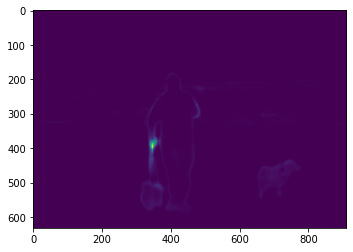

In [23]:
output_heatmap=output_proba[127]
plt.imshow(output_heatmap.asnumpy())

In [24]:
prediction=mx.nd.argmax(output,0).asnumpy()
print(prediction.shape)

(632, 910)


In [25]:
print(prediction)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [9. 9. 9. ... 9. 9. 9.]
 [9. 9. 9. ... 9. 9. 9.]
 [9. 9. 9. ... 9. 9. 9.]]


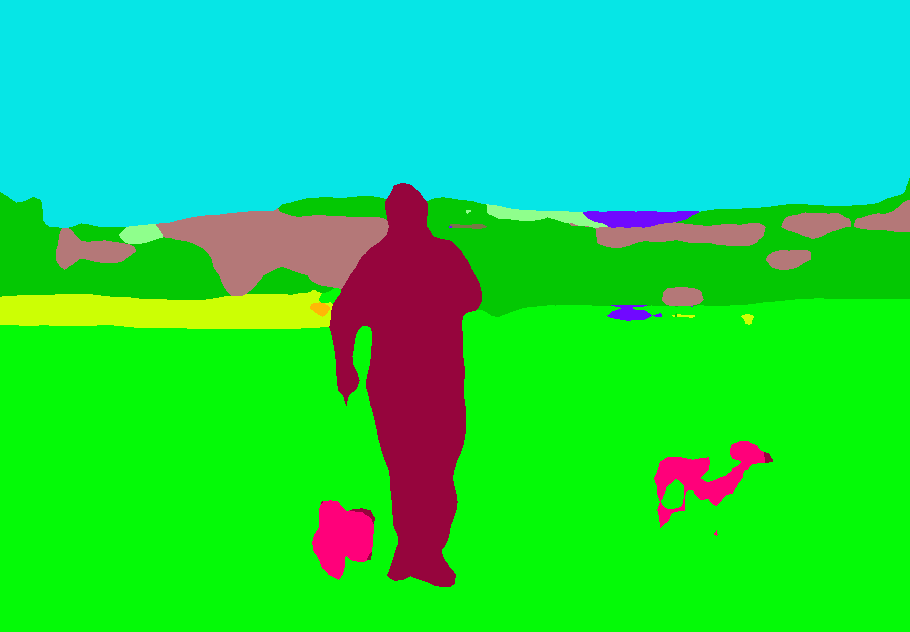

In [26]:
from gluoncv.utils.viz import get_color_pallete
prediction_image=get_color_pallete(prediction,'ade20k')
prediction_image